<!-- # Cryptography
## Exercise sheet 0
AAAAAAAAAA AAAAAAA
AAAAAAAAAAAAAAAAAAAA  -->

<h1 style="text-align:center">Cryptography<br/>Exercise sheet 0</h1>
<h5 style="text-align:center">
  AAAAAAAAAA AAAAAAA<br/>
  <a href="mailto:AAAAAAAAAAAAAAAAAAAA">AAAAAAAAAAAAAAAAAAAA</a>
</h5>

## EX0.1 Secure email

### (i) The email

There are many ways to send signed emails. The text of the Exercise mentions something to do with Thunderbird, but I don't want to install an email client, and mess around with another unfamiliar program, so we're doing it the old fashioned way with command line `gpg`!

First we need to create a key. Even if you have an old one, ideally this new one should be under your university email.

```bash
gpg --full-generate-key
```

It will ask you for your name, email and a bunch of random entropy.
To check if it works we can output the full list of our gpg keys: 

```bash
gpg --list-keys
```

![image.png](attachment:image.png)

To sign our email, we have to first save its text into a txt file <small>(let's call it "email.txt")</small>, and then run this command to sign it:

```bash
gpg --clearsign --output - email.txt
```

We get the following blob of text:
```plaintext
-----BEGIN PGP SIGNED MESSAGE-----
Hash: SHA256

There are so many ways to send signed emails.

Is this anything?
Probably not...
But we'll see!
-----BEGIN PGP SIGNATURE-----

iQGzBAEBCAAdFiEELsc8702qzPxCn6YPpeDTrUB1cPEFAmU2+AkACgkQpeDTrUB1
cPHmvwv/cITYfaF4Bq7rFm/dISdbSnmWpEzKEjBwGXNUWvQ2uUJ32eTyBSH+D3me
5H99tQNEMc/Q7oPlTtboeoVZOVduAQStUMMIpwa0ubrU6AvKvdmpCuTkt7lVHUsX
nUXFHIvihGZtE7yLJA87ZsaZ9d6Nq0tQMgw+Z9egzVHN7jLz8XS5/nmEgHKpX110
ScTdzAU28wFotakQhQFzkg9e+y7mCDS0ACaIx/OazgVz6fo0q7G3Zm+W+CA5DB7T
mL1ut1+bfsMmN6sJVtIaBiC4hzi75/xWSrw4cIqGvvqm6uXTKlv/DVXwU5Ynm692
ClOtCnlXfGMkr+OiqTnISa2i85YgdF81Tnus5K5FwD8iSeM/FL+VpJqZkf7kcF+5
L84nfaerrRlNsyjGy/591Np/erKzM8ohZaBik+G08aV4bTsu94F+HdL/EWIJHhLD
B4JI6NhMG573tCGYCRvhkxzh6ihwtizKGjcju7gG3Vy006oKstGjm0/PLA3/4HCI
v1JvMg6l
=cJ4y
-----END PGP SIGNATURE-----
```

And then we can just copy paste it into any email client we like, and send it like a normal email!!

But we forgot to attach the public key... It has to be exported first:

```bash
gpg --armor --export AAAAAAAAAAAAAAAAAAAA
```

### (ii) The fingerprint

We actually already know the fingerprint! It's the string of hex digits outputted by our `--list-keys` command.

For me it would be `FA27305CDA8014470562437AB58B4B03372C85CA` and the `0xB58B4B03372C85CA` is the shorter version.

> (Do not send an email with it. Guess, why!)

I actually have no idea... It would make sense not to send it to anyone if it was the private key, but no.
Also some simpler cyphers are vulnerable to not being able to encrypt their own keys, but I don't think it applies to RSA, and even if it does, our key is hashed and ascii-hex encoded...
I guess it would just be redundant, because we're already sending our whole public key with the email 🤔

## EX0.2 Monoalphabetic cipher

### (i) Compute the frequency table.

First we have to load the text into our programming language of choice <small>(Python of course)</small>.
There's a file `exercises/00-mono.txt` in our Sciebo folder, so we can just grab that.

In [1]:
ciphertext = open("exercises/00-mono.txt", 'r').read()
ciphertext


"QDH FAX YN XKT ANRKDHXTJ PDROMDXTHG FQ XKT ANQDGKYFNDPET  TNJ  FQ\nXKT  MTGXTHN  GWYHDE  DHU  FQ  XKT CDEDSI EYTG D GUDEE ANHTCDHJTJ\nITEEFM GAN.\n\nFHPYXYNC XKYG DX D JYGXDNRT FQ HFACKEI NYNTXI-XMF  UYEEYFN  UYETG\nYG  DN  AXXTHEI YNGYCNYQYRDNX EYXXET PEAT CHTTN WEDNTX MKFGT DWT-\nJTGRTNJTJ EYQT QFHUG DHT GF DUDBYNCEI WHYUYXYVT XKDX  XKTI  GXYEE\nXKYNO JYCYXDE MDXRKTG DHT D WHTXXI NTDX YJTD.\n\nXKYG WEDNTX KDG - FH HDXKTH KDJ - D WHFPETU, MKYRK MDG XKYG: UFGX\nFQ  XKT  WTFWET  FN  YX MTHT ANKDWWI QFH WHTXXI UARK FQ XKT XYUT.\nUDNI GFEAXYFNG MTHT GACCTGXTJ QFH XKYG WHFPETU, PAX UFGX FQ XKTGT\nMTHT  EDHCTEI  RFNRTHNTJ MYXK XKT UFVTUTNXG FQ GUDEE CHTTN WYTRTG\nFQ WDWTH, MKYRK YG FJJ PTRDAGT FN XKT MKFET YX MDGN'X  XKT  GUDEE\nCHTTN WYTRTG FQ WDWTH XKDX MTHT ANKDWWI.\n\nDNJ GF XKT WHFPETU HTUDYNTJ; EFXG FQ XKT WTFWET  MTHT  UTDN,  DNJ\nUFGX FQ XKTU MTHT UYGTHDPET, TVTN XKT FNTG MYXK JYCYXDE MDXRKTG.\n\nUDNI MTHT YNRHTDGYNCEI FQ XKT FWYNYFN XKDX XKTI'J DEE UDJT D  PYC\nUYGXDOT  YN  RFUYNC

The code is very similar to what we've done on the tutorial today <small>(in the `00-the-gold-bug.ipynb` notebook)</small>, only a lot better 🙂

In [2]:
from collections import Counter

# remove everything that's not a letter. because these symbols will pass thru the cipher unchanged
clean_ciphertext = [x for x  in ciphertext if x.isalpha()]
counter = Counter(clean_ciphertext)
counter


Counter({'Q': 30,
         'D': 118,
         'H': 73,
         'F': 98,
         'A': 27,
         'X': 125,
         'Y': 84,
         'N': 95,
         'K': 78,
         'T': 182,
         'R': 29,
         'J': 54,
         'P': 21,
         'O': 6,
         'M': 39,
         'G': 72,
         'E': 70,
         'W': 34,
         'U': 37,
         'C': 30,
         'S': 1,
         'I': 27,
         'B': 2,
         'V': 10})

And these are our frequencies! We're done of part (i).

### (ii) Decrypt.

Here we have the decryption function from the seminar, but this time written in one line. Also it has time complexity $O(n)$, and not $O(n^2)$, because we aren't concatenating strings all the time 😈 <small>(sorry for complaining about the code)</small>

The first function substitutes all the characters that are already known in our key, ignores non-letters and replaces everything else with underscores.
I also added a second function, to help with the manual decoding effort. It mixes together deciphered and original characters <small>(you can tell which is which, based on the case. i'm gonna make all deciphered characters lowercase)</small>, so it's easy to tell what cipher character is needed in an almost completed word.

In [3]:
def decrypt(ciphertext, key):
  return "".join(key[x] if x in key else "_" if x.isalpha() else x for x in ciphertext)

def decrypt_mixed(ciphertext, key):
  return "".join(key[x] if x in key else x for x in ciphertext)


Also, as int that tutorial, we should load the letter frequency table for english. And plot it next to our ciphertext frequency table.

In [4]:
english_letter_freq = {
  'a': 8.2,
  'b': 1.5,
  'c': 2.8,
  'd': 4.2,
  'e': 12.7,
  'f': 2.2,
  'g': 2.0,
  'h': 6.1,
  'i': 7.0,
  'j': 0.1,
  'k': 0.8,
  'l': 4.0,
  'm': 2.4,
  'n': 6.7,
  'o': 7.5,
  'p': 1.9,
  'q': 0.1,
  'r': 6.0,
  's': 6.3,
  't': 9.0,
  'u': 2.8,
  'v': 1.0,
  'w': 2.4,
  'x': 2.0,
  'y': 0.1,
  'z': 0.1,
}


In [5]:
import matplotlib.pyplot as plt
import numpy as np


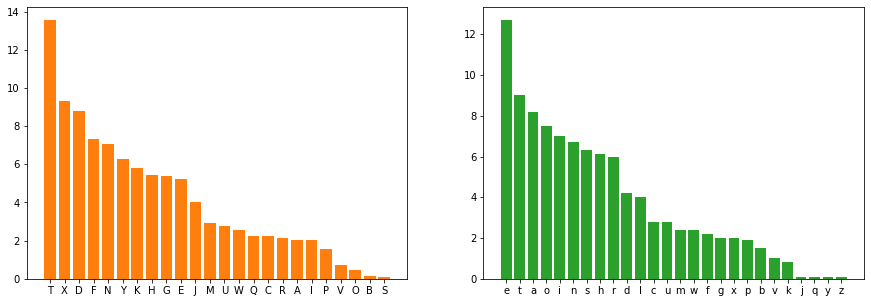

In [6]:
common = counter.most_common()
X1 = [k for k,v in common]
Y1 = np.array([v for k,v in common])
Y1 = Y1/sum(Y1)*100 # normalize it so it's the same as the english data we have

english = sorted(english_letter_freq.items(), key=lambda x: -x[1])
X2 = [k for k,v in english]
Y2 = np.array([v for k,v in english])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.bar(X1, Y1, color='C1')
ax2.bar(X2, Y2, color='C2')
plt.show()


I also write some helper code to store the history of our key, and make it easer to iterate on it.

In [34]:
# ignore this code: it's here to make everything else look pretty
key_history = [{}]
key = {}
decrypted = ""
mixed = ""
def make_assignment(k, v, i=-1):
  global key_history, key, decrypted, mixed

  key = key_history[i]
  if i != -1:
    key_history = key_history[:(i+1)]
    key = {**key}
    key_history.append(key)
  key.update({k: v})
  decrypted = decrypt(ciphertext, key)
  mixed = decrypt_mixed(ciphertext, key)


We can safely pick "T -> e", but the other letters aren't so obvious. "X" and "D" could be "t" and "a" or they could be the other way a around!

In [35]:
make_assignment('T', 'e', 0)
print(decrypted)


___ ___ __ __e _______e_ _______e__ __ __e ____________e  e__  __
__e  _e__e__  ______  ___  __  __e ______ __e_ _ _____ ___e____e_
_e____ ___.

________ ____ __ _ _______e __ _______ ___e__-___  _______  ___e_
__  __  ___e___ _____________ _____e ___e __ee_ ____e_ ____e __e-
_e__e__e_ ___e _____ __e __ _________ ________e ____  __e_  _____
_____ _______ _____e_ __e _ __e___ _e__ __e_.

____ ____e_ ___ - __ ____e_ ___ - _ _____e_, _____ ___ ____: ____
__  __e  _e___e  __  __ _e_e _______ ___ __e___ ____ __ __e ___e.
____ _________ _e_e ____e__e_ ___ ____ _____e_, ___ ____ __ __e_e
_e_e  ____e__  ____e__e_ ____ __e ___e_e___ __ _____ __ee_ __e_e_
__ ___e_, _____ __ ___ _e____e __ __e ____e __ ____'_  __e  _____
__ee_ __e_e_ __ ___e_ ____ _e_e _______.

___ __ __e _____e_ _e____e_; ____ __ __e _e___e  _e_e  _e__,  ___
____ __ __e_ _e_e ___e____e, e_e_ __e __e_ ____ _______ _____e_.

____ _e_e ____e_______ __ __e _______ ____ __e_'_ ___ ___e _  ___
______e  __  ______  ____  ____ __e __ee

Because this time the ciphertext is clearly separated into words, we can find the most frequent ones and look for "the" in them. It's already convenient to use the partially deciphered `mixed` variable for this.

In [8]:
def common_words(text: str, n=5):
  clean_text = "".join(x if x.isalpha() else " " for x in text)
  counter = Counter(clean_text.split())
  return counter.most_common(n)

common_words(mixed)


[('XKe', 19), ('FQ', 13), ('D', 12), ('DNJ', 9), ('YX', 7)]

The first word is "XKe" and we already had a hypotheses that "X" is "t", so this lines up pretty well with it being "the". And the word "D" lines up with being "a".

In [36]:
make_assignment('X', 't', 1)
make_assignment('D', 'a')
make_assignment('K', 'h')
print(decrypted)


_a_ __t __ the ___ha_te_ _a___ate__ __ the ___a_h___a__e  e__  __
the  _e_te__  ____a_  a__  __  the _a_a__ __e_ a __a__ ___e_a__e_
_e____ ___.

____t___ th__ at a ___ta__e __ ____h__ ___et_-t__  _______  ___e_
__  a_  _tte___ __________a_t __tt_e ___e __ee_ __a_et _h__e a_e-
_e__e__e_ ___e _____ a_e __ a_a______ _____t__e that  the_  _t___
th___ ____ta_ _at_he_ a_e a __ett_ _eat __ea.

th__ __a_et ha_ - __ _athe_ ha_ - a _____e_, _h__h _a_ th__: ___t
__  the  _e___e  __  _t _e_e __ha___ ___ __ett_ ___h __ the t__e.
_a__ ____t____ _e_e ____e_te_ ___ th__ _____e_, __t ___t __ the_e
_e_e  _a__e__  ____e__e_ __th the ___e_e_t_ __ __a__ __ee_ __e_e_
__ _a_e_, _h__h __ ___ _e_a__e __ the _h__e _t _a__'t  the  __a__
__ee_ __e_e_ __ _a_e_ that _e_e __ha___.

a__ __ the _____e_ _e_a__e_; __t_ __ the _e___e  _e_e  _ea_,  a__
___t __ the_ _e_e ___e_a__e, e_e_ the __e_ __th ____ta_ _at_he_.

_a__ _e_e ____ea______ __ the _______ that the_'_ a__ _a_e a  ___
___ta_e  __  ______  ____  ____ the t_ee

Look at how many "that"-s we got!! We're clearly doing something right!
If assigning the first 3 letters by frequency alone worked out so well, let's just do more of the same.
Assigning "F" -> "o".

In [37]:
make_assignment('F', 'o', 2)
print(decrypted)


_a_ o_t __ the ___ha_te_ _a___ate__ o_ the ___a_h_o_a__e  e__  o_
the  _e_te__  ____a_  a__  o_  the _a_a__ __e_ a __a__ ___e_a__e_
_e__o_ ___.

o___t___ th__ at a ___ta__e o_ _o__h__ ___et_-t_o  _____o_  ___e_
__  a_  _tte___ __________a_t __tt_e ___e __ee_ __a_et _ho_e a_e-
_e__e__e_ ___e _o___ a_e _o a_a______ _____t__e that  the_  _t___
th___ ____ta_ _at_he_ a_e a __ett_ _eat __ea.

th__ __a_et ha_ - o_ _athe_ ha_ - a __o__e_, _h__h _a_ th__: _o_t
o_  the  _eo__e  o_  _t _e_e __ha___ _o_ __ett_ ___h o_ the t__e.
_a__ _o__t_o__ _e_e ____e_te_ _o_ th__ __o__e_, __t _o_t o_ the_e
_e_e  _a__e__  _o__e__e_ __th the _o_e_e_t_ o_ __a__ __ee_ __e_e_
o_ _a_e_, _h__h __ o__ _e_a__e o_ the _ho_e _t _a__'t  the  __a__
__ee_ __e_e_ o_ _a_e_ that _e_e __ha___.

a__ _o the __o__e_ _e_a__e_; _ot_ o_ the _eo__e  _e_e  _ea_,  a__
_o_t o_ the_ _e_e ___e_a__e, e_e_ the o_e_ __th ____ta_ _at_he_.

_a__ _e_e ____ea______ o_ the o____o_ that the_'_ a__ _a_e a  ___
___ta_e  __  _o____  _o__  __o_ the t_ee

Let's look at the common words again. It might be easer to see something with more decrypted letters.

In [42]:
common_words(mixed, 11)


[('the', 19),
 ('oQ', 13),
 ('a', 12),
 ('aNJ', 9),
 ('Yt', 7),
 ('MeHe', 7),
 ('to', 7),
 ('thYG', 6),
 ('that', 6),
 ('YN', 5),
 ('oNe', 5)]

The 'oQ' might be 'of', 'oNe' looks suspiciously like 'one' and 'aNJ' is probably 'and'.
Let's test them out.

In [43]:
make_assignment('Q', 'f', 3)
make_assignment('N', 'n')
make_assignment('J', 'd')
print(decrypted)


fa_ o_t _n the _n_ha_ted _a___ate__ of the _nfa_h_ona__e  end  of
the  _e_te_n  ____a_  a__  of  the _a_a__ __e_ a __a__ _n_e_a_ded
_e__o_ __n.

o___t_n_ th__ at a d__tan_e of _o__h__ n_net_-t_o  _____on  ___e_
__  an  _tte___ _n___n_f__ant __tt_e ___e __een __anet _ho_e a_e-
de__ended __fe fo___ a_e _o a_a__n___ _____t__e that  the_  _t___
th_n_ d___ta_ _at_he_ a_e a __ett_ neat _dea.

th__ __anet ha_ - o_ _athe_ had - a __o__e_, _h__h _a_ th__: _o_t
of  the  _eo__e  on  _t _e_e _nha___ fo_ __ett_ ___h of the t__e.
_an_ _o__t_on_ _e_e ____e_ted fo_ th__ __o__e_, __t _o_t of the_e
_e_e  _a__e__  _on_e_ned __th the _o_e_ent_ of __a__ __een __e_e_
of _a_e_, _h__h __ odd _e_a__e on the _ho_e _t _a_n't  the  __a__
__een __e_e_ of _a_e_ that _e_e _nha___.

and _o the __o__e_ _e_a_ned; _ot_ of the _eo__e  _e_e  _ean,  and
_o_t of the_ _e_e ___e_a__e, e_en the one_ __th d___ta_ _at_he_.

_an_ _e_e _n__ea__n___ of the o__n_on that the_'d a__ _ade a  ___
___ta_e  _n  _o__n_  do_n  f_o_ the t_ee

Look very good. All the word look real so far. The phrase "\_\_ett\_ neat \_dea" (actually "WHettI neat Ydea") look like a "pretty neat idea". Let's use that idea 🙂

In [46]:
make_assignment('W', 'p', 4)
make_assignment('H', 'r')
make_assignment('I', 'y')
make_assignment('Y', 'i')
print(decrypted)


far o_t in the _n_harted _a___ater_ of the _nfa_hiona__e  end  of
the  _e_tern  _pira_  ar_  of  the _a_a_y _ie_ a __a__ _nre_arded
ye__o_ __n.

or_itin_ thi_ at a di_tan_e of ro__h_y ninety-t_o  _i__ion  _i_e_
i_  an  _tter_y in_i_nifi_ant _itt_e ___e _reen p_anet _ho_e ape-
de__ended _ife for__ are _o a_a_in__y pri_iti_e that  they  _ti__
thin_ di_ita_ _at_he_ are a pretty neat idea.

thi_ p_anet ha_ - or rather had - a pro__e_, _hi_h _a_ thi_: _o_t
of  the  peop_e  on  it _ere _nhappy for pretty ___h of the ti_e.
_any _o__tion_ _ere ____e_ted for thi_ pro__e_, __t _o_t of the_e
_ere  _ar_e_y  _on_erned _ith the _o_e_ent_ of __a__ _reen pie_e_
of paper, _hi_h i_ odd _e_a__e on the _ho_e it _a_n't  the  __a__
_reen pie_e_ of paper that _ere _nhappy.

and _o the pro__e_ re_ained; _ot_ of the peop_e  _ere  _ean,  and
_o_t of the_ _ere _i_era__e, e_en the one_ _ith di_ita_ _at_he_.

_any _ere in_rea_in__y of the opinion that they'd a__ _ade a  _i_
_i_ta_e  in  _o_in_  do_n  fro_ the tree

Wow this was fast. You can almost read the text now. I noticed the "thi\_ p\_anet ha\_ - or rather had" (this planet has) and "\_reen pie\_e\_ of paper" (green pieces of paper) and "\_ere \_nhappy" (were unhappy). It seems like the text is talking about money 🤔

In [49]:
# thiG pEanet haG
# Creen pieReG of paper that Mere Anhappy
make_assignment('G', 's', 5)
make_assignment('E', 'l')
make_assignment('C', 'g')
make_assignment('R', 'c')
make_assignment('M', 'w')
make_assignment('A', 'u')
print(decrypted)


far out in the uncharted _ac_waters of the unfashiona_le  end  of
the  western  spiral  ar_  of  the gala_y lies a s_all unregarded
yellow sun.

or_iting this at a distance of roughly ninety-two  _illion  _iles
is  an  utterly insignificant little _lue green planet whose ape-
descended life for_s are so a_a_ingly pri_iti_e that  they  still
thin_ digital watches are a pretty neat idea.

this planet has - or rather had - a pro_le_, which was this: _ost
of  the  people  on  it were unhappy for pretty _uch of the ti_e.
_any solutions were suggested for this pro_le_, _ut _ost of these
were  largely  concerned with the _o_e_ents of s_all green pieces
of paper, which is odd _ecause on the whole it wasn't  the  s_all
green pieces of paper that were unhappy.

and so the pro_le_ re_ained; lots of the people  were  _ean,  and
_ost of the_ were _isera_le, e_en the ones with digital watches.

_any were increasingly of the opinion that they'd all _ade a  _ig
_ista_e  in  co_ing  down  fro_ the tree

From the first paragraph we get 4 more letters: "backwaters", "unfashionable", "arm", "galaxy", "small" 

In [52]:
# far out in the uncharted PacOwaters of the unfashionaPle  end  of
# the  western  spiral  arU  of  the galaSy lies a sUall unregarded
# yellow sun.
make_assignment('P', 'b', 6)
make_assignment('O', 'k')
make_assignment('U', 'm')
make_assignment('S', 'x')
print(mixed)


far out in the uncharted backwaters of the unfashionable  end  of
the  western  spiral  arm  of  the galaxy lies a small unregarded
yellow sun.

orbiting this at a distance of roughly ninety-two  million  miles
is  an  utterly insignificant little blue green planet whose ape-
descended life forms are so amaBingly primitiVe that  they  still
think digital watches are a pretty neat idea.

this planet has - or rather had - a problem, which was this: most
of  the  people  on  it were unhappy for pretty much of the time.
many solutions were suggested for this problem, but most of these
were  largely  concerned with the moVements of small green pieces
of paper, which is odd because on the whole it wasn't  the  small
green pieces of paper that were unhappy.

and so the problem remained; lots of the people  were  mean,  and
most of them were miserable, eVen the ones with digital watches.

many were increasingly of the opinion that they'd all made a  big
mistake  in  coming  down  from the tree

It's starting to be hard to look for missing letters, but I found "amaBingly primitiVe" (amazingly primitive)

In [56]:
make_assignment('B', 'z', 7)
make_assignment('V', 'v')
print(mixed)


far out in the uncharted backwaters of the unfashionable  end  of
the  western  spiral  arm  of  the galaxy lies a small unregarded
yellow sun.

orbiting this at a distance of roughly ninety-two  million  miles
is  an  utterly insignificant little blue green planet whose ape-
descended life forms are so amazingly primitive that  they  still
think digital watches are a pretty neat idea.

this planet has - or rather had - a problem, which was this: most
of  the  people  on  it were unhappy for pretty much of the time.
many solutions were suggested for this problem, but most of these
were  largely  concerned with the movements of small green pieces
of paper, which is odd because on the whole it wasn't  the  small
green pieces of paper that were unhappy.

and so the problem remained; lots of the people  were  mean,  and
most of them were miserable, even the ones with digital watches.

many were increasingly of the opinion that they'd all made a  big
mistake  in  coming  down  from the tree

Looks like we're done!

In [58]:
'_' in decrypted, len(key)


(False, 24)

And we are! Tho 2 letters ("j" and "q") are still missing from the key. It just shows how rare they are.

In [60]:
for e in key_history: print(e)


{}
{'T': 'e'}
{'T': 'e', 'X': 't', 'D': 'a', 'K': 'h'}
{'T': 'e', 'X': 't', 'D': 'a', 'K': 'h', 'F': 'o'}
{'T': 'e', 'X': 't', 'D': 'a', 'K': 'h', 'F': 'o', 'Q': 'f', 'N': 'n', 'J': 'd'}
{'T': 'e', 'X': 't', 'D': 'a', 'K': 'h', 'F': 'o', 'Q': 'f', 'N': 'n', 'J': 'd', 'W': 'p', 'H': 'r', 'I': 'y', 'Y': 'i'}
{'T': 'e', 'X': 't', 'D': 'a', 'K': 'h', 'F': 'o', 'Q': 'f', 'N': 'n', 'J': 'd', 'W': 'p', 'H': 'r', 'I': 'y', 'Y': 'i', 'G': 's', 'E': 'l', 'C': 'g', 'R': 'c', 'M': 'w', 'A': 'u'}
{'T': 'e', 'X': 't', 'D': 'a', 'K': 'h', 'F': 'o', 'Q': 'f', 'N': 'n', 'J': 'd', 'W': 'p', 'H': 'r', 'I': 'y', 'Y': 'i', 'G': 's', 'E': 'l', 'C': 'g', 'R': 'c', 'M': 'w', 'A': 'u', 'P': 'b', 'O': 'k', 'U': 'm', 'S': 'x'}
{'T': 'e', 'X': 't', 'D': 'a', 'K': 'h', 'F': 'o', 'Q': 'f', 'N': 'n', 'J': 'd', 'W': 'p', 'H': 'r', 'I': 'y', 'Y': 'i', 'G': 's', 'E': 'l', 'C': 'g', 'R': 'c', 'M': 'w', 'A': 'u', 'P': 'b', 'O': 'k', 'U': 'm', 'S': 'x', 'B': 'z', 'V': 'v'}


We can look at our whole key history and the final key

In [61]:
key


{'T': 'e',
 'X': 't',
 'D': 'a',
 'K': 'h',
 'F': 'o',
 'Q': 'f',
 'N': 'n',
 'J': 'd',
 'W': 'p',
 'H': 'r',
 'I': 'y',
 'Y': 'i',
 'G': 's',
 'E': 'l',
 'C': 'g',
 'R': 'c',
 'M': 'w',
 'A': 'u',
 'P': 'b',
 'O': 'k',
 'U': 'm',
 'S': 'x',
 'B': 'z',
 'V': 'v'}

Also this text is the prologue to _The Hitchhiker's Guide to the Galaxy_.